In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1.groupby("size")["size"].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [6]:
#Drop the unwanted columns
df2=df1.drop(["area_type","society","balcony","availability"],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
#Now begins the Data Cleaning process

#Check for Null Values
df2.isnull().sum()



location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
#drop all the null values
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 5)

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
#Same meaning for bedrooms and BHK,create new column for BHK
#Using lambda function

df3['bhk']=df3['size'].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-11-46e481768373>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(" ")[0]))


In [12]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df3[df3['bhk']>25]
#df3[df3.bhk>25]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df3.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
#Range is Identified and it should be converted into single value
#Check the variation of values in the column

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
#Take the average for the ranges
#remove the other rows from the data frame

def convert_sqft_to_num(x):
    tokens=x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [19]:
convert_sqft_to_num('5354Sq.Meter')

In [20]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [22]:
#Feature Engineering is started from here

df5=df4.copy()



In [23]:
#Creating a new feature to help the Outlier Detection process

df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df5['location'].unique())

1304

In [25]:
df5.location=df5.location.apply(lambda x:x.strip())
location_status=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_status

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [26]:
len(location_status[location_status<=10])

1052

In [27]:
location_less_than_10=location_status[location_status<=10]
location_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [28]:
len(df5['location'].unique())

1293

In [29]:
#Dimensionally Reduction
#reduce the types of location based on the data points appeared
df5.location=df5.location.apply(lambda x:'other' if x in location_less_than_10 else x)
len(df5.location.unique())

242

In [30]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
#Outlier Detection and Removel

df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
df5.shape

(13246, 7)

In [33]:
#Remove the unbelievable values
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.head()
df6.shape

(12502, 7)

In [34]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        stdev=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-stdev)) & (subdf.price_per_sqft<=(m+stdev))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)
df7.shape

(10241, 7)

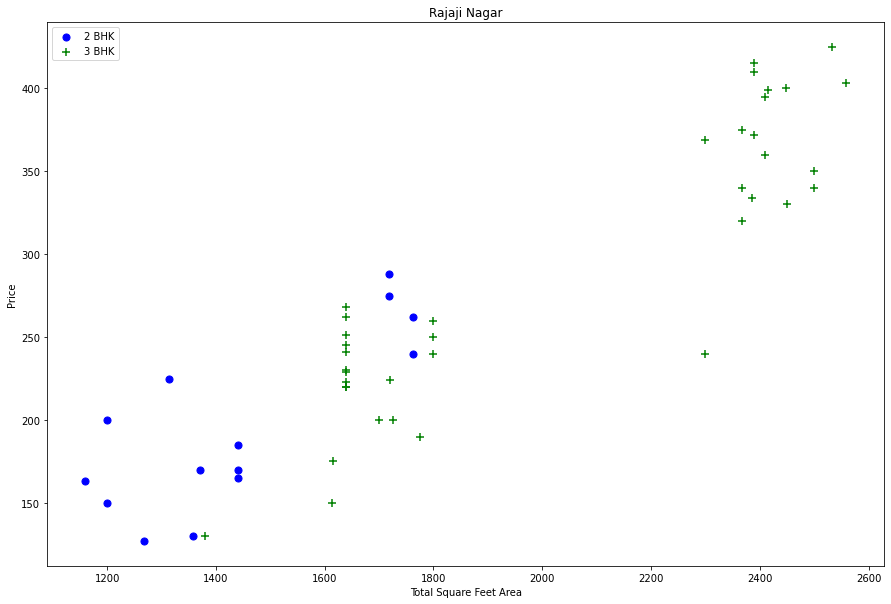

In [36]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")
    
    
    
    

In [37]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
                
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8=remove_bhk_outliers(df7)
df8.shape

(7329, 7)

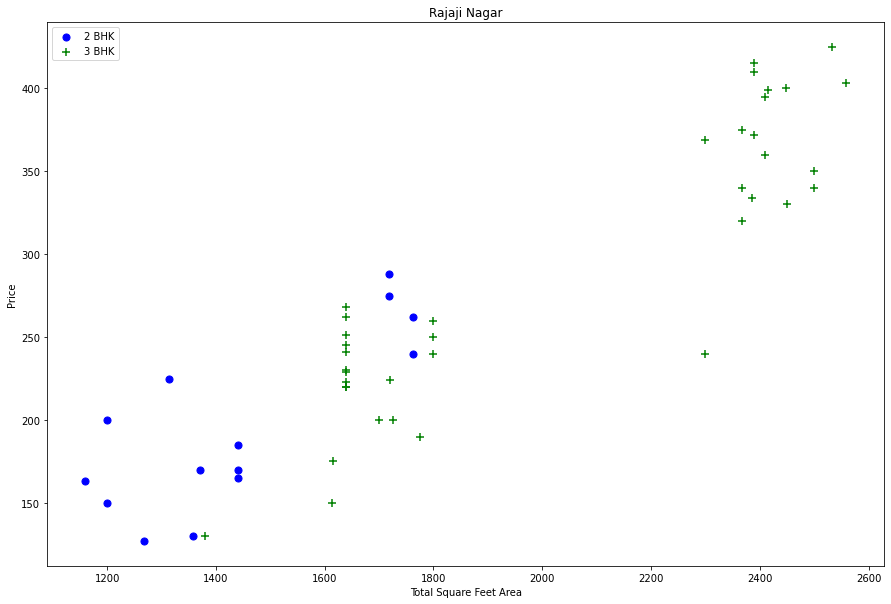

In [38]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")
    
    
    
    

Text(0, 0.5, 'count')

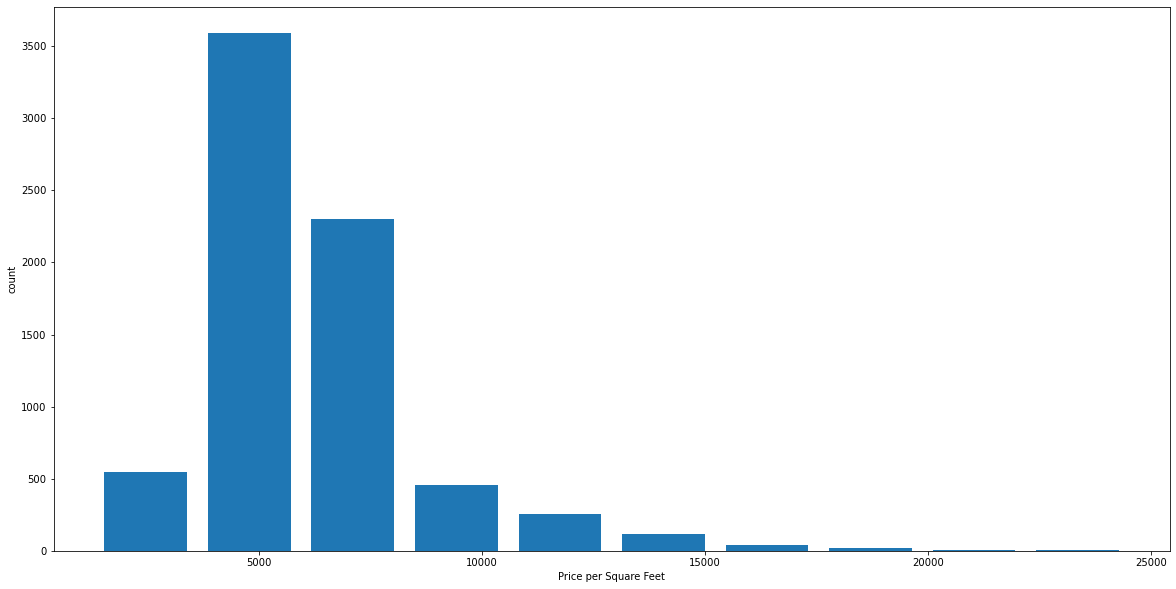

In [39]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("count")

In [40]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [41]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

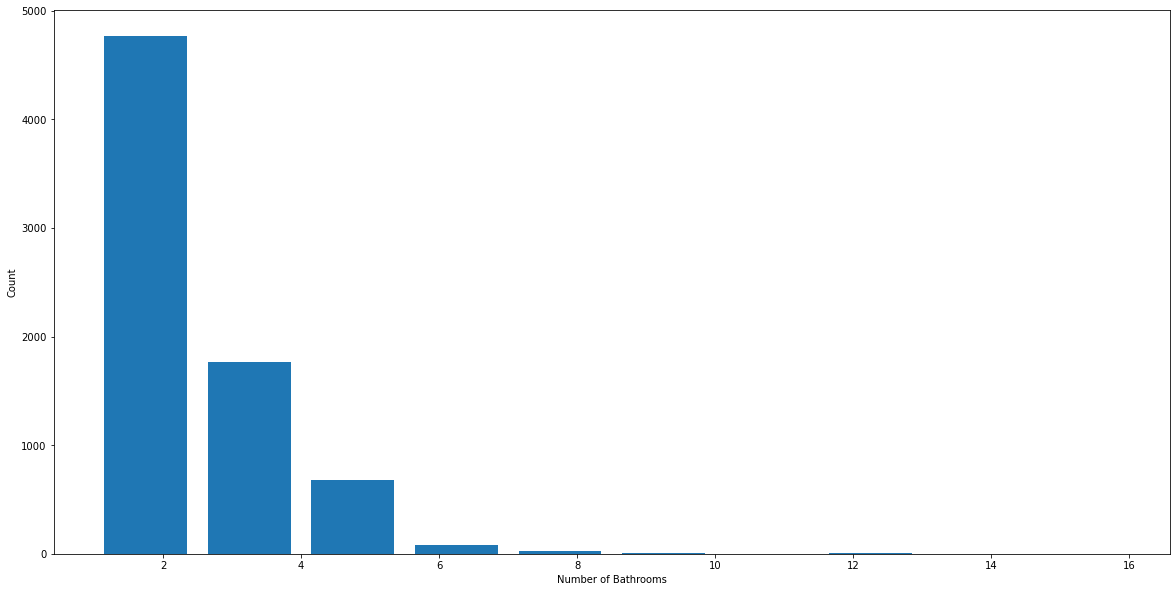

In [42]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [43]:
df8[df8.bath<df8.bhk+2].tail


<bound method NDFrame.tail of                   location       size  total_sqft  bath  price  bhk  \
0      1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
1      1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2      1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
3      1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
4      1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
...                    ...        ...         ...   ...    ...  ...   
10232                other      2 BHK      1200.0   2.0   70.0    2   
10233                other      1 BHK      1800.0   1.0  200.0    1   
10236                other      2 BHK      1353.0   2.0  110.0    2   
10237                other  1 Bedroom       812.0   1.0   26.0    1   
10240                other      4 BHK      3600.0   5.0  400.0    4   

       price_per_sqft  
0        15017.543860  
1        11901.840491  
2        12533.333333  
3        10833.333333

In [44]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [45]:
df10=df9.drop(["size","price_per_sqft"],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [46]:
#Label Encoding
#Convert Catagorical data into numerical data

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df10['location_num']=encoder.fit_transform(df10['location'])

location_dic=dict(zip(df10['location'].unique(),df10['location_num'].unique()))
df11=df10.drop(['location'],axis='columns')
df11.rename(columns = {'location_num':'location'}, inplace = True)


df11

,total_sqft,bath,price,bhk,location
0,2850.0,4.0,428.0,4,0
1,1630.0,3.0,194.0,3,0
2,1875.0,2.0,235.0,3,0
3,1200.0,2.0,130.0,3,0
4,1235.0,2.0,148.0,2,0
...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,241
10233,1800.0,1.0,200.0,1,241
10236,1353.0,2.0,110.0,2,241
10237,812.0,1.0,26.0,1,241


In [47]:
x=df11.drop(['price'],axis='columns')
y=df11['price']


In [48]:
data=x.values
target=y.values
print(data)

[[2.850e+03 4.000e+00 4.000e+00 0.000e+00]
 [1.630e+03 3.000e+00 3.000e+00 0.000e+00]
 [1.875e+03 2.000e+00 3.000e+00 0.000e+00]
 ...
 [1.353e+03 2.000e+00 2.000e+00 2.410e+02]
 [8.120e+02 1.000e+00 1.000e+00 2.410e+02]
 [3.600e+03 5.000e+00 4.000e+00 2.410e+02]]


In [49]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [50]:
print(train_data,train_data.shape)
print(test_data,test_data.shape)


[[1.404e+03 2.000e+00 2.000e+00 2.340e+02]
 [1.000e+03 2.000e+00 2.000e+00 1.700e+01]
 [5.384e+03 5.000e+00 5.000e+00 1.120e+02]
 ...
 [2.378e+03 3.000e+00 3.000e+00 1.060e+02]
 [4.500e+02 1.000e+00 1.000e+00 2.380e+02]
 [1.650e+03 3.000e+00 3.000e+00 2.900e+01]] (5800, 4)
[[1065.    2.    2.  187.]
 [1077.    2.    2.   29.]
 [1279.    2.    2.  115.]
 ...
 [1150.    2.    2.  143.]
 [1180.    2.    2.  231.]
 [1549.    3.    3.   74.]] (1451, 4)


In [51]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(train_data,train_target)

LinearRegression()

In [52]:
from sklearn.metrics import r2_score

r2_score=model.score(test_data,test_target)
print(r2_score)

0.7016490398621679


In [53]:
print('Accuracy: ',r2_score*100,'%')

Accuracy:  70.16490398621679 %


In [54]:
y=model.predict([[3000,4,4,1]])
print(y)

[220.01006674]


In [55]:
def predict_price(sqft,bath,bhk,location):
    location_label_num=location_dic.get(location)
    predicted_value=model.predict([[sqft,bath,bhk,location_label_num]])
    return predicted_value
    

In [56]:
print(predict_price(1000,3,3,'1st Phase JP Nagar'))

[49.83944683]


In [57]:
print(predict_price(1000,2,2,'Indira Nagar'))

[53.85515381]


In [58]:
import pickle
with open('real_state_price_model.pickle','wb') as f:
    pickle.dump(model,f)

In [59]:
import json

columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
